In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_mutual_info_score,adjusted_rand_score

In [3]:
SEED = 13
np.random.seed(13)

# Task A
## 1.1 Importing all things data files 

### Getting Vocab

In [4]:
with open('bbcsport.terms','r') as f:
    terms = f.readlines() # read the vocab file. Returns a list
print(len(terms)) # number of words present in the vocab

4613


In [5]:
terms[:5] # see first 5 values

['claxton\n', 'hunt\n', 'first\n', 'major\n', 'medal\n']

values have \n at the end so we have to clean it

In [6]:
terms = [i.strip('\n') for i in terms] 
# only works at the end of the string irrespective of any number of times \n is at the end or starting
terms[:5]

['claxton', 'hunt', 'first', 'major', 'medal']

### Getting Labels

In [7]:
with open('bbcsport.classes','r') as f: # open the y labels of all the articles
    trueLabels = f.readlines()
len(trueLabels)

741

In [8]:
trueLabels[:10] # print first 10 values

['%%Clustering hard\n',
 '%Name NaturalClasses\n',
 '%Clusters 5 athletics,cricket,football,rugby,tennis\n',
 '%Objects\n',
 '0 0\n',
 '1 0\n',
 '2 0\n',
 '3 0\n',
 '4 0\n',
 '5 0\n']

We need to remove first 4 lines, get the 2nd line as the names of the classes and remove the trailing '\n'. Then we can seperate the index of the article and the corresponding value of label from it.

In [9]:
classes = trueLabels[2].strip('%').strip('\n').split(' ')[2:][0].split(',')
# get the second index that is third line. strip the '\n' from that and as it is a string, convert it to list by using 
# .split() and we have a list of words. There will be 3 words so get the last word and seperate them by , to get the 5 words

classes

['athletics', 'cricket', 'football', 'rugby', 'tennis']

In [10]:
trueLabels = trueLabels[4:]
trueLabels = [int(i.split(' ')[1].strip('\n')) for i in trueLabels ]
# split the words by space, split the trailing '\n' and get the integer values to have the labels for all the articles
trueLabels[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

### Getting Feature Matrix

In [11]:
with open('bbcsport.mtx','r') as f:
    feature_matrix = f.readlines()
feature_matrix[:5]

['%%MatrixMarket matrix coordinate real general\n',
 '4613 737 85576\n',
 '1 1 7.0\n',
 '1 58 2.0\n',
 '1 59 1.0\n']

In [12]:
feature_matrix = feature_matrix[2:]
feature_matrix[:5]

['1 1 7.0\n', '1 58 2.0\n', '1 59 1.0\n', '1 60 1.0\n', '1 68 1.0\n']

In [13]:
feature_matrix = [i.strip('\n').split(' ') for i in feature_matrix ]
feature_matrix[:5]

[['1', '1', '7.0'],
 ['1', '58', '2.0'],
 ['1', '59', '1.0'],
 ['1', '60', '1.0'],
 ['1', '68', '1.0']]

### Building Features as Frequency Count Vectors

In [14]:
X = np.zeros((737,4613))

In [15]:
for i in range(len(feature_matrix)):
    x = feature_matrix[i]
    word_index = int(x[0])-1
    docid = int(x[1])-1
    freq = float(x[2])
    X[docid][word_index] = freq

In [16]:
y = np.array(trueLabels)

### Splitting Train and Test

In [17]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=SEED)

## 1.2 K- Means clustering with Euclidean Distance
Working of k-means is not based on distances but minimizes within-cluster variance.
K mean clustering forms clusters by continuously calculating the ```Euclidean Distance``` (by default ```the sum of squared deviations from centroid is equal to the sum of pairwise squared Euclidean distances divided by the number of points```) of centroids from all of the data points and assigning them to different clusters. The very origin of the term 'centroid' has come from Euclidean representation as it is multivariate mean in euclidean space. That's why K-Means is for Euclidean distances only.

In [18]:
random_states = np.random.randint(100000,size=50) # choose 50 random numbers
adj_mutual = []
adj_rand = []
for STATE in random_states: 
    k_m_eu = KMeans(random_state=STATE,n_clusters=5,n_init=1).fit(X_train,y_train)
    y_pred = k_m_eu.predict(X_test)
    adj_mutual.append(adjusted_mutual_info_score(y_test,y_pred))
    adj_rand.append(adjusted_rand_score(y_test,y_pred))

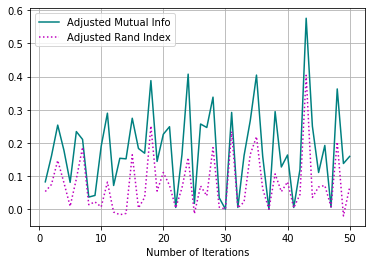

In [19]:
plt.plot(range(1,51),adj_mutual,label='Adjusted Mutual Info',color='teal')
plt.plot(range(1,51),adj_rand,label='Adjusted Rand Index',color='m',ls='dotted')
plt.xlabel('Number of Iterations')
plt.legend()
plt.grid()

In [20]:
print(f'Average Adjusted Mutual Info after 50 random centroids is {sum(adj_mutual)/50}')
print(f'Average Adjusted Rand Index after 50 random centroids is {sum(adj_rand)/50}')

Average Adjusted Mutual Info after 50 random centroids is 0.18063929172658014
Average Adjusted Rand Index after 50 random centroids is 0.0751890215973453


In [23]:
k_m_eu.cluster_centers_

array([[ 5.20417043e-18, -6.93889390e-18,  1.53191489e+00, ...,
         2.60208521e-18, -6.93889390e-18, -4.33680869e-18],
       [ 1.13851992e-02,  7.59013283e-03,  8.08349146e-01, ...,
         3.79506641e-03,  7.59013283e-03,  3.79506641e-03],
       [ 0.00000000e+00,  9.09090909e-02,  4.27272727e+00, ...,
         0.00000000e+00,  1.73472348e-18,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  4.33333333e+00, ...,
         3.33333333e-01,  3.33333333e-01,  6.66666667e-01],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

## 1.3  K-Means with some other metrices
## NOTE- K- Mean is a specific algorithm which works on ```Euclidean Distance``` but not some general case algorithm. K-means needs to be able to find the means of different subsets of the points to cluster, so it does not make sense to say that you have to use ```OTHER SIMILARITY METRIC``` for the discances computation. **K-Mean can fail to Converge with some other distance metric**

## *But we can use  ```cosine``` which is just Euclidean distance on normalized input points, ```correlation``` that is Euclidean on standardized inputs*

Manhattan-distance variant of k-means, there is k-medians. Because the median is a known best L1 estimator or for arbitrary distance functions, there is k-medoids or PAM or Partitioning Around Medoids. The medoid minimizes arbitrary distances (because it is defined as the minimum), and there only exist a finite number of possible medoids, too.

### Applying Standardized inputs and Normalized inputs to implement cosine and correlation
### ```Cosine```

In [41]:
from sklearn.preprocessing import StandardScaler,Normalizer

In [42]:
X_std = StandardScaler().fit_transform(X)
X_norm = Normalizer().fit_transform(X)

In [43]:
X_train,X_test, y_train, y_test = train_test_split(X_std,y,test_size=0.2,random_state=SEED)

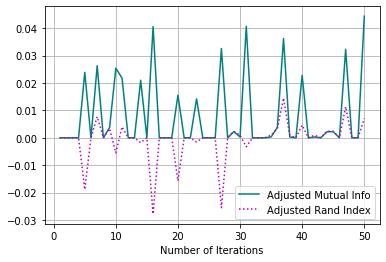

In [44]:
random_states = np.random.randint(100000,size=50) # choose 50 random numbers
adj_mutual = []
adj_rand = []
for STATE in random_states: 
    k_m_cos = KMeans(random_state=STATE,n_clusters=5,n_init=1).fit(X_train,y_train)
    y_pred = k_m_cos.predict(X_test)
    adj_mutual.append(adjusted_mutual_info_score(y_test,y_pred))
    adj_rand.append(adjusted_rand_score(y_test,y_pred))

plt.plot(range(1,51),adj_mutual,label='Adjusted Mutual Info',color='teal')
plt.plot(range(1,51),adj_rand,label='Adjusted Rand Index',color='m',ls='dotted')
plt.xlabel('Number of Iterations')
plt.legend()
plt.grid()

In [45]:
print(f'Average Adjusted Mutual Info after 50 random centroids for Cosine is {sum(adj_mutual)/50}')
print(f'Average Adjusted Rand Index after 50 random centroids for Cosine is {sum(adj_rand)/50}')

Average Adjusted Mutual Info after 50 random centroids for Cosine is 0.00825146009796811
Average Adjusted Rand Index after 50 random centroids for Cosine is -0.0006648190481768397


### ```Correlation```

In [47]:
X_train,X_test, y_train, y_test = train_test_split(X_norm,y,test_size=0.2,random_state=SEED)

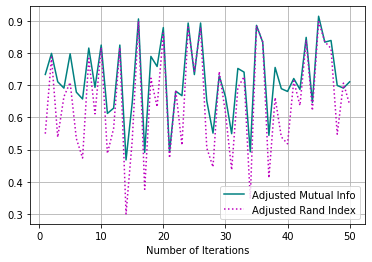

In [48]:
random_states = np.random.randint(100000,size=50) # choose 50 random numbers
adj_mutual = []
adj_rand = []
for STATE in random_states: 
    k_m_cos = KMeans(random_state=STATE,n_clusters=5,n_init=1).fit(X_train,y_train)
    y_pred = k_m_cos.predict(X_test)
    adj_mutual.append(adjusted_mutual_info_score(y_test,y_pred))
    adj_rand.append(adjusted_rand_score(y_test,y_pred))

plt.plot(range(1,51),adj_mutual,label='Adjusted Mutual Info',color='teal')
plt.plot(range(1,51),adj_rand,label='Adjusted Rand Index',color='m',ls='dotted')
plt.xlabel('Number of Iterations')
plt.legend()
plt.grid()

In [49]:
print(f'Average Adjusted Mutual Info after 50 random centroids for Correlation is {sum(adj_mutual)/50}')
print(f'Average Adjusted Rand Index after 50 random centroids for Correlation is {sum(adj_rand)/50}')

Average Adjusted Mutual Info after 50 random centroids for Correlation is 0.7174782284305459
Average Adjusted Rand Index after 50 random centroids for Correlation is 0.6488623346157736


## Using K- Mediods for ```OTHER METRICES```

In [50]:
pip install pyclustering

  Created wheel for pyclustering: filename=pyclustering-0.9.3.1-cp37-none-any.whl size=2599365 sha256=abbbd914a2265ce9f3dd1b143a0d0900b7cd9998a3bab2e26db2be1016a1e5e2
  Stored in directory: C:\Users\Admin\AppData\Local\pip\Cache\wheels\34\d6\ac\59746c226a35752edcd786d3ab96f9b547a2b70d0fbda92015
Successfully built pyclustering
Note: you may need to restart the kernel to use updated packages.


In [72]:
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster import cluster_visualizer_multidim

In [56]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=SEED)

In [76]:
from scipy.spatial.distance import minkowski
from pyclustering.utils.metric import distance_metric
from pyclustering.utils.metric import type_metric

In [77]:
random_centroids = np.random.randint(low=X_train.min(),high=X_train.max(),size=(50,5))
metric = distance_metric(type_metric.MINKOWSKI, degree=2)
for i in range(1):
    kmedoids_instance = kmedoids(X_train, random_centroids[i],metric=metric)
    kmedoids_instance.process()

    clusters = kmedoids_instance.get_clusters()
    medoids = kmedoids_instance.get_medoids()

In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


## Q B

In [30]:
from sklearn.decomposition import PCA

In [55]:
explained_var = []
comp = 1
flag95=True
flag98=True
exp_var = 0
while exp_var<0.98:
    pca = PCA(n_components=comp).fit(X_train,y_train)
    exp_var = sum(pca.explained_variance_ratio_)
    if exp_var>0.95 and flag95:
        print(f'Minimum {comp} components explain 95% variance')
        flag95 = False
    if exp_var>0.98 and flag98:
        print(f'Minimum {comp} components explain 95% variance')
        flag98 = False
    if comp%100==0:
        print(comp,exp_var)
    explained_var.append(exp_var)
    comp+=1

100 0.6492513634908498
200 0.8131907133329529
300 0.903155533120068
Minimum 385 components explain 95% variance
400 0.9567783058618048
Minimum 468 components explain 95% variance


In [ ]:
plt.plot(range(1,len(explained_var)),explained_var)